# Exploring the diamonds data set.

This IPython notebook takes a look at the diamonds data set. We first do some exploratory data analysis followed by some visualization and modeling.

* **Contents**
   - [Modules Used](#Modules-Used)
   - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
      * [Data Attributes](#Data-Attributes)
      * [Basic Data Stats](#Basic-Data-Stats)
         * [Mean Prices by Cut](#Mean-Prices-by-Cut)
         * [Mean Prices by Cut and Color](#Mean-Prices-by-Cut-and-Color)
         * [What about clarity?](#What-about-clarity?)
         * [Where's the missing data?](#Where's-the-missing-data?)
   - [Data Visualization](#Data-Visualization)
      * [Histogram of Prices](#Histogram-of-Prices)
      * [Skewness Test](#Skewness-Test)
      * [Prices by cut](#Prices-by-cut)
      * [Prices by carat](#Prices-by-carat)
      * [Outliers by carat](#Outliers-by-carat)
      * [Box Plots](#Box-Plots)
         * [Zooming In](#Zooming-In)
      * [Prrices by cut and clarity](#Prices-by-cut-and-clarity)
      * [Are some diamonds rare?](#Are-some-diamonds-rare?)
      * [Violin Plots](#Violin-Plots)
      * [Flawless but cheap?](#Flawless-but-cheap?)
   - Modeling
      * [Linear regression](#Linear-regression-in-the-diamond-mines)
        * [Train-Test-Split](#Data-Split)
        * [Label Encoding](#Label-Encoding)
        * [The Model](#The-Model)
        * [Model Evaluation](#Model-Evaluation)
          * [What's in the R<sup>2</sup>?!](#What's-in-the-R-squared?!)
        * [Approaching Reality](#Towards-Reality)
         * [Feature Selection](#Feature-Importance-and-Selection)
         
    - [Future Steps and Feedback](#Future-Steps)

## Modules Used


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from seaborn import load_dataset
import seaborn as sns


## Exploratory Data Analysis

To begin our analysis, we need to first get a general idea of what our  dataset looks like. To do this, we shall first take a look at a few common procedures in exploratory data analysis.


In [4]:
# Loading the data set
diamonds = load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Having taken a peak at our data set, there are a few things that need to be done. 
First, we need to have a general understanding of what the columns stand for. For instance, it would be hard to understand what x, y and z stood for unless you had prior knowledge about the data set.

### Data Attributes

There are a couple of ways to find out what the column mean: One could simply guess that x, y and z refer to the lengths, widths and heights of the diamonds. One could also do a simple web search. 

Preferably, one can take a look at the dataset's documentation as shown next. Regrettably, the data set is not well documented by the package authors.

In [8]:
#?diamonds

However, a web [search](https://rstudio-pubs-static.s3.amazonaws.com/316651_5c92e58ef8a343e4b3f618a7b415e2ad.html) does identify what the columns mean and x, y, z are as guessed above.


## Basic Data Stats

Before, taking a look at the data's basic statistics, it might be useful to give the data more meanignful names. To do that, we shall use a data frame(`DataFrame`)'s `rename` method with a `dictionary` mapping.  Since the default is to set `inplace` to `False`, we can set that to `True`.

In [5]:
diamonds.rename(columns = {'x': 'length', 'y': 'width', 'z': 'height'}, inplace = True)
diamonds.head()


,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Since we are now more comfortable with the dataset's column names since they are more informative, we can proceed to look at the basic stats.

In [6]:
diamonds.describe()

,carat,depth,table,price,length,width,height
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From the above, we can see that the mean price was high. However, looking at these statistics is less informative since these may vary by cut, color, clarity or depth. Therefore looking at these statistics by group could be more informative.

## Mean Prices by Cut

In [7]:
diamonds.groupby("cut").mean()

,carat,depth,table,price,length,width,height
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


From the above, it is clearer that the mean prices for instance as one might have expected vary by cut. There is an almost linear relationship between cut and price. It is also interesting to note that the mean depth does not vary that much across the different cut(s).

We can take the above a step further by looking at how prices for instance vary when the data is grouped by both cut and color.

## Mean Prices by Cut and Color

In [8]:
# use vectorised cython functions instead.
diamonds.groupby(["cut", "color"]).mean()

carat      depth      table        price    length  \
cut       color                                                          
Fair      D      0.920123  64.048466  58.969325  4291.061350  6.018344   
          E      0.856607  63.319643  59.364732  3682.312500  5.909063   
          F      0.904712  63.508013  59.453205  3827.003205  5.990513   
          G      1.023822  64.339809  58.773248  4239.254777  6.173822   
          H      1.219175  64.585149  58.696370  5135.683168  6.579373   
          I      1.198057  64.220571  59.237143  4685.445714  6.564457   
          J      1.341176  64.357143  58.917647  4975.655462  6.747311   
Good      D      0.744517  62.365710  58.541541  3405.382175  5.620076   
          E      0.745134  62.203751  58.779957  3423.644159  5.617889   
          F      0.775930  62.202310  58.910891  3495.750275  5.693443   
          G      0.850896  62.526636  58.471986  4123.482204  5.850264   
          H      0.914729  62.499573  58.611111  4276.254986  5.968789   
          I      1.057222  62.475096  58.773946  5078.532567  6.253544   
          J      1.099544  62.395765  58.813029  4574.172638  6.377003   
Ideal     D      0.565766  61.678370  55.965632  2629.094566  5.186704   
          E      0.578401  61.686677  55.967461  2597.550090  5.215762   
          F      0.655829  61.675562  55.924203  3374.939362  5.408751   
          G      0.700715  61.700164  55.902375  3720.706388  5.511214   
          H      0.799525  61.733194  55.965843  3889.334831  5.731377   
          I      0.913029  61.793598  56.021357  4451.970377  5.976197   
          J      1.063594  61.821987  56.012612  4918.186384  6.320045   
Premium   D      0.721547  61.169245  58.718964  3631.292576  5.599869   
          E      0.717745  61.175909  58.779461  3538.914420  5.587116   
          F      0.827036  61.259974  58.679279  4324.890176  5.876692   
          G      0.841488  61.279480  58.702360  4500.742134  5.864254   
          H      1.016449  61.322034  58.792034  5216.706780  6.244508   
          I      1.144937  61.328641  58.771849  5946.180672  6.489531   
          J      1.293094  61.390099  58.874752  6294.591584  6.809975   
Very Good D      0.696424  61.750165  58.041309  3470.467284  5.501210   
          E      0.676317  61.730250  58.038875  3214.652083  5.432467   
          F      0.740961  61.721627  57.848429  3778.820240  5.610504   
          G      0.766799  61.841279  57.784428  3872.753806  5.660204   
          H      0.915948  61.968366  57.903015  4535.390351  5.982286   
          I      1.046952  61.934551  58.105150  5255.879568  6.272259   
          J      1.133215  61.902065  58.277729  5103.513274  6.460782   

                    width    height  
cut       color                      
Fair      D      5.963190  3.839877  
          E      5.858214  3.722143  
          F      5.931122  3.787821  
          G      6.114076  3.963153  
          H      6.497393  4.219373  
          I      6.493486  4.193486  
          J      6.675882  4.319664  
Good      D      5.633897  3.504864  
          E      5.632454  3.496066  
          F      5.709659  3.544609  
          G      5.862824  3.647922  
          H      5.974245  3.726937  
          I      6.260536  3.901513  
          J      6.386026  3.977459  
Ideal     D      5.196224  3.201800  
          E      5.232214  3.220346  
          F      5.422250  3.338732  
          G      5.524007  3.403120  
          H      5.740446  3.539917  
          I      5.989479  3.695270  
          J      6.332098  3.912757  
Premium   D      5.571472  3.415926  
          E      5.558353  3.408875  
          F      5.844655  3.588391  
          G      5.833345  3.579641  
          H      6.228110  3.811699  
          I      6.453270  3.963894  
          J      6.770644  4.168020  
Very Good D      5.531613  3.405089  
          E      5.463213  3.373996  
          F      5.642717  3.472902  
          G      5.688752  

The nature of the display does not allow for a great interpretation of the data. However, from the few fields shown, we can seee a clear difference in prices with respect to color. 
## What about clarity?

In [9]:
diamonds.groupby("clarity").mean()

,carat,depth,table,price,length,width,height
clarity,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465


The focus of our analysis has upto now been on the mean prices. It is worth noting what the clarity actually [means](https://ggplot2.tidyverse.org/reference/diamonds.html): **a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**. With that in mind, the mean prices appear to follow a non linear relationship with respect to clarity. We will verify this as the notebook progresses statistically. 

Having look at a few basic stats about the data(remember we focused entirely on the mean), we now take a different route. We need to visualize our data which might reveal more trends and perhaps provide a more informative picture. However, important for modeling purposes is whether we have missing data.

## Where's the missing data?

There are several ways to find missing data, but we will represent it as the percentage of each column that is missing.

In [10]:
#diamonds.apply(lambda x: sum(x.notnull())/len(x) * 100)
# rewrite with transform
#diamonds.dtypes
# I conclude that there is no(as far as I know and have researched) more concise alternative to using apply
#diamonds[diamonds.notnull()].groupby(["cut", "color", "clarity"]).transform("sum")
diamonds.notnull().sum() / len(diamonds) * 100

carat      100.0
cut        100.0
color      100.0
clarity    100.0
depth      100.0
table      100.0
price      100.0
length     100.0
width      100.0
height     100.0
dtype: float64

From the above, we can see that all our columns in fact have 100% of the data which is great. We can then proceed with data visualization.
## Data Visualization

## Histogram of Prices

To visualize the prices, we can either use `matplotlib`, `pandas` or `seaborn` amongst other libraries. We shall use `matplotlib`'s `hist`.

Text(0.5, 0, 'Prices(USD)')

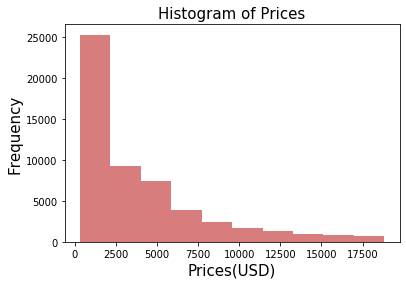

In [11]:
%matplotlib inline
plt.figure()
plt.hist(x = "price", data = diamonds, color = "indianred", alpha = 0.8)
plt.title("Histogram of Prices", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Prices(USD)", fontsize = 15)


From the above we it appears(as one might expect), the distribution of prices is **skewed to the right** ie as the prices increase, the number of diamonds decrease. We can carry out a skewness test using `scipy`'s `stats` module to verify this.

## Skewness Test

In [12]:
from scipy.stats import skew
skew(diamonds["price"])

1.6183502776053016

From the above, our skew is a positive value(greater than 1) indicating a positive skewness which means that our mean is greater than the median. Let us look at our data's median and mean prices to verify.

In [13]:
from IPython.display import display
display(diamonds["price"].mean())
display(diamonds["price"].median())


3932.799721913237

2401.0

## Prices by cut

For this part, we shall uses `seaborn`'s awesome functions that deal with categorical plots.

Text(0.5, 1, 'Prices by cut')

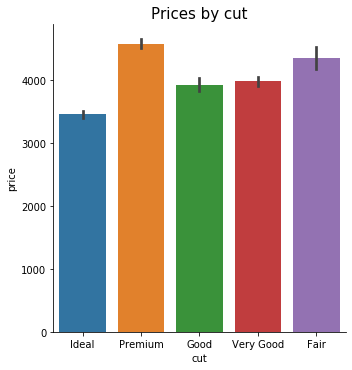

In [15]:
sns.catplot(x="cut", y="price",kind="bar", data = diamonds)
plt.title("Prices by cut", fontsize = 15)

However, to make the above plot more "attractive"/informative/intuitive, we could go a step further and sort the values before plotting them.

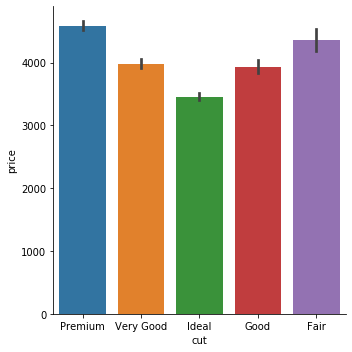

In [16]:
sorted_data = diamonds.sort_values(by = ["price"] , ascending = False)
#sorted_data.head()
# probably a better way exists that leverages col_order
# This sorts the x-axis in alphabetical order which is a bit less informative
sns.catplot(x = "cut", y="price", data = sorted_data, kind = "bar")



As shown in [Mean Prices by Cut](#Mean-Prices-by-Cut), the prices do vary by cut and as already stated the relatioship appears to be linear ie as the quality(cut) of the diamond increases, so does its price. There will however always be outliers.  Let us take a look at the prices by carat.

## Prices by carat

Text(0, 0.5, 'Price')

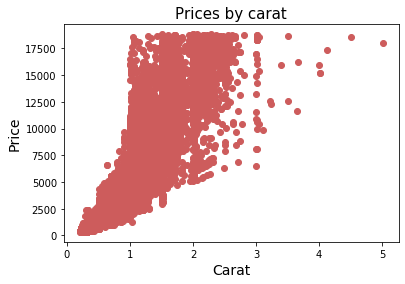

In [17]:
plt.scatter(x = "carat", y = "price", data = diamonds, color = "indianred")
plt.title("Prices by carat", fontsize = 15)
plt.xlabel("Carat", fontsize = 14)
plt.ylabel("Price", fontsize = 14)

In general, the distribution of the prices is such that most of the diamonds fall in the lower half. On the issue of outliers, there are visible outliers for instance 5 carat diamonds which is a bit unusual. To get a better understanding of these outliers, we shall filter our data set for these outliers and get more info about them.

## Outliers by carat

We see that there is only a single diamond with a carat greater than or equal to 5. Interesting is the fact that the price of this diamond is comparatively high especially given it is of just fair cut. 


In [18]:
diamonds[diamonds["carat"] >=5]

,carat,cut,color,clarity,depth,table,price,length,width,height
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


For completeness, we shall show a more pandas like way to achieve the above result. This achieves the same purpose in arguably more user-friendly code. This is especially useful if one is used to querying data bases.

In [19]:
diamonds.query("carat >=5")

,carat,cut,color,clarity,depth,table,price,length,width,height
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


## Box Plots

Having looked at a few plots, perhaps looking at box and whiskers plots might provide more insight about the data set. What we are interested in is the distirbution of our data across various categories. Let's look at the clarity.

Text(0, 0.5, 'price')

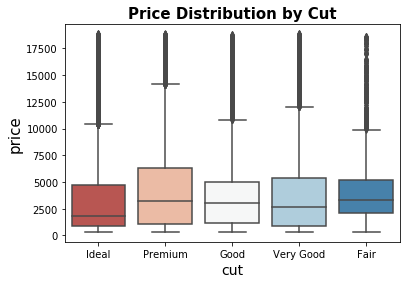

In [20]:
sns.boxplot(x="cut", y="price", data = diamonds, palette = "RdBu")
plt.title("Price Distribution by Cut", fontsize = 15, fontweight = "bold")
plt.xlabel("cut",size=14)
plt.ylabel("price", size = 15)

The above box plot does give a general idea of how the prices are distributed across the different cuts. As noted previously, there appears to be a linear relationship between cut and price. We however, see a few points that do not exactly fall within the range ie they are above the upper quartile(outliers).

## Zooming In

We therefore take a look at these by "zooming in" on the data set as follows. It is interesting to note that the mean prices for this data set do not appear to follow a linear relationship. 

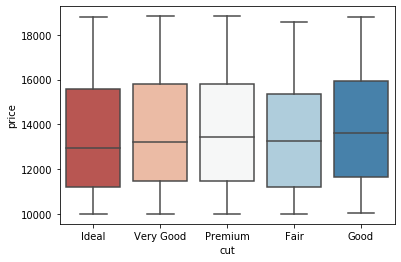

In [21]:
filtered = diamonds.query("price > 10000")

sns.boxplot(x = "cut", y = "price", data = filtered, palette = "RdBu")

We have seen(visually) how price is influence by cut but what happens when we add clarity to the story?
## Prices by cut and clarity

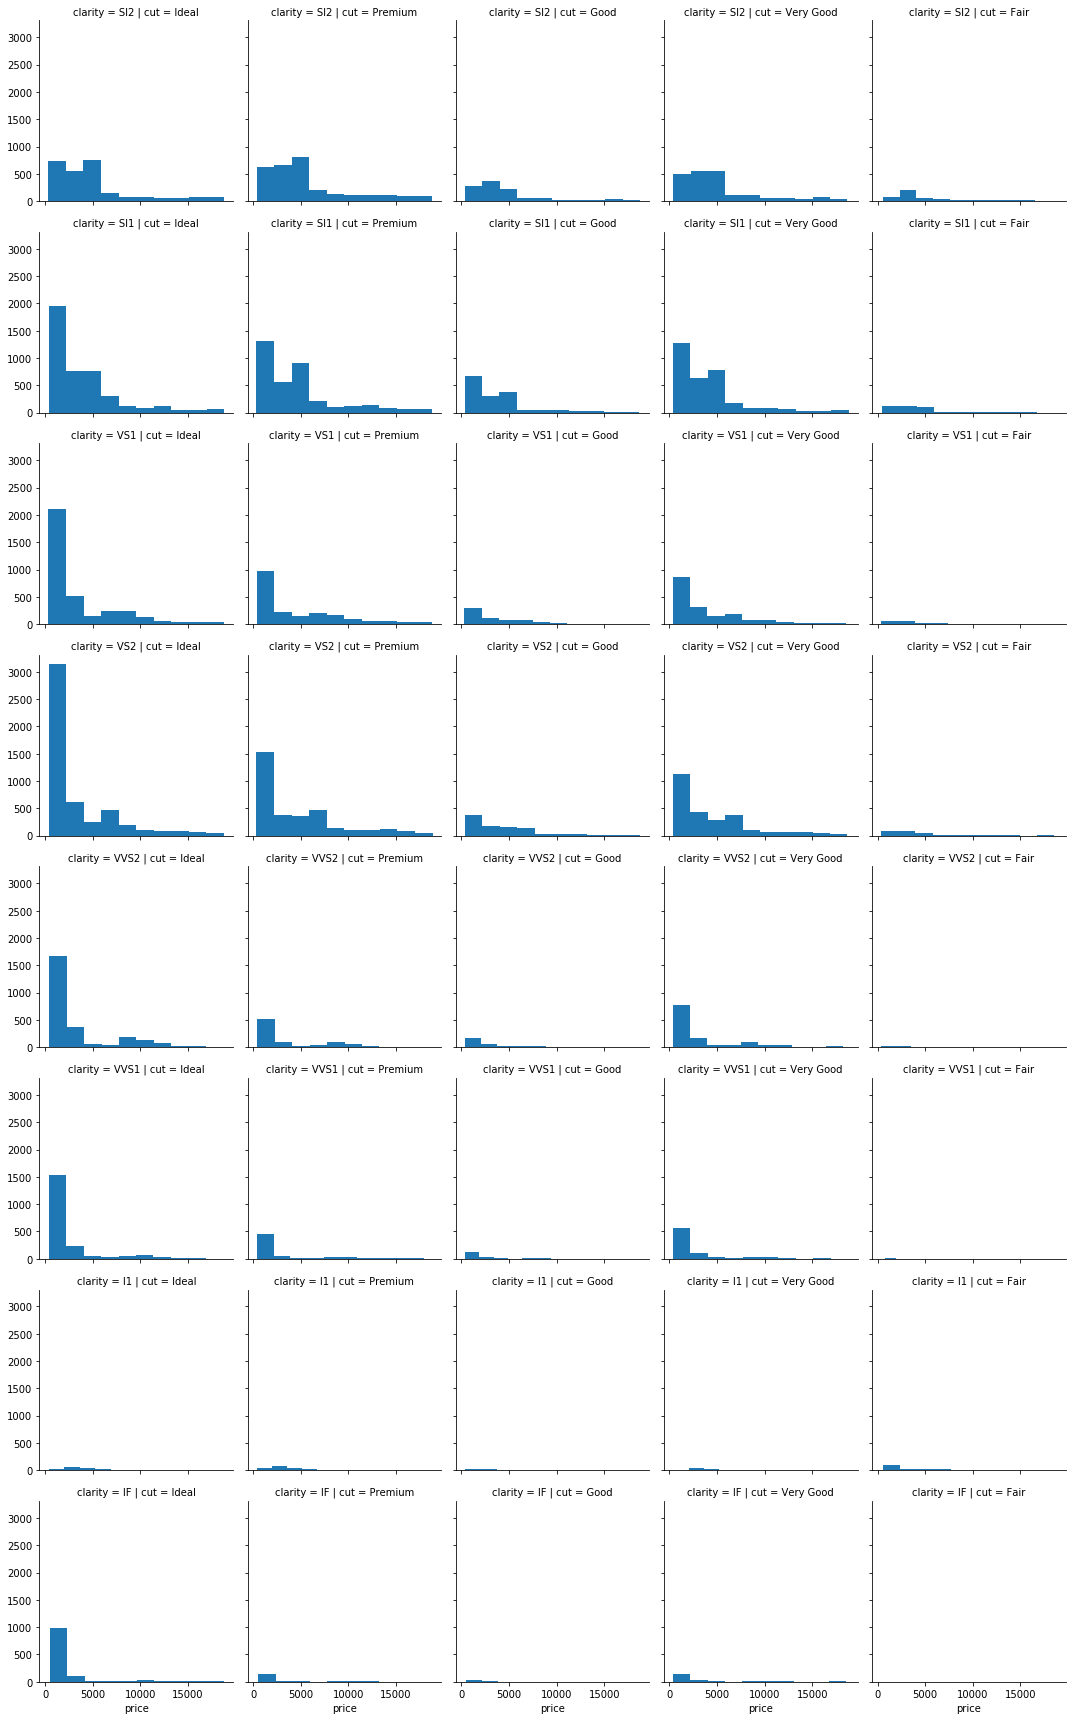

In [22]:

facets = sns.FacetGrid(col = "cut", row = "clarity", data = diamonds)
facets.map(plt.hist, "price")


The above plot gives a more detailed account of the price distribution with respect to cut and clarity. The majority of the diamonds appear to fall in the ideal and VS2 category.

Interesting are the very low numbers of diamonds that fit I1 and good cut criterion. It is also surprising to see that clarity IF and fair cut almost has no diamonds. 

This is surprising because IF(Internally flawless) diamonds would be expected to be more even with a fair cut. This might however imply that these are extremely rare diamonds.

To get a clearer picture, we could visualize the distribution by clarity.

## Are some diamonds rare?

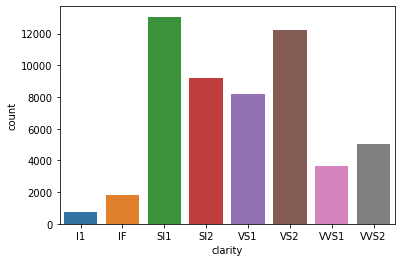

In [23]:
column_order = sorted(diamonds.clarity.unique())
sns.countplot(x="clarity", data = diamonds.sort_values(["price", "depth"]), order = column_order)

Indeed, we see that internally flawless(IF) diamonds occupy a relatively small portion of the data set. This could perhaps be due to mining techniques. Indeed, [these are extremely rare diamonds](https://beyond4cs.com/clarity/if-and-fl/).

## Violin Plots

We can take this a step further to visualize price distribution by clarity. In this example, we are essentially zooming in on our data to get the distribution of diamonds whose price is greater than or equal to 10000 USD.

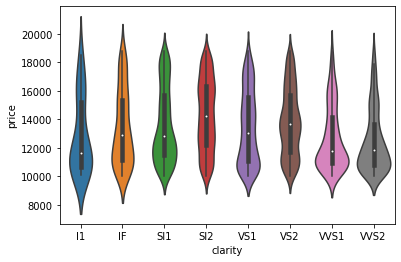

In [24]:
sns.violinplot(x="clarity", y="price", data = diamonds.query("price > 10000").sort_values("price"),
              order = column_order)

When I first made this plot, one could see that the internally flawless diamonds had a lower mean price than other levels of clarity. It is interesting however and as one might probably have expected to see that if we zoom in on the dataset to include higher prices, the mean price of the innternally flawless is higher than that of included(I1) and almost equal to that of the slightly included. 

This therefore suggests that the price of a diamond is(logically) determined by more than just its clarity. 

## Flawless but cheap?


In [25]:
diamonds.groupby("clarity").mean()

,carat,depth,table,price,length,width,height
clarity,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465


To take the above a step further, we can sort the clarity in increasing or decreasing order as per the industry standards. 

In [26]:
#diamonds.clarity, order = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1","SI2","I1"])
# convert to categorical
#pd.Categorical(diamonds["clarity"], categories= ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1","SI2","I1"] )
# This is probbaly computationally expensive
categorize_data = pd.CategoricalDtype(categories= ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1","SI2","I1"])
diamonds["clairty"] = pd.Series(diamonds.clarity, dtype = categorize_data)
diamonds.groupby("clairty").mean()

,carat,depth,table,price,length,width,height
clairty,,,,,,,
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908


The above is probably a better approach since we now have our data sorted as per an expert in the diamond mining business would expect. Let's see what a plot of this data would look like.

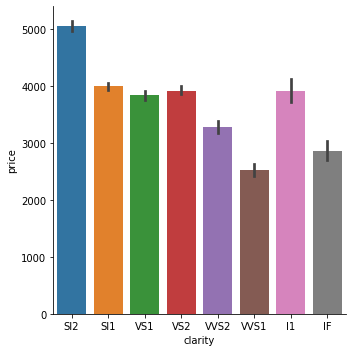

In [27]:
# Ok, seaborn's x axis really needs an upgrade. It is currently in my opinion less flexible.
sns.catplot(x = "clarity", y="price", data =  diamonds, kind = "bar",
          col_order = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1","SI2","I1"])

# Linear regression in the diamond mines

In order to carry out regression analysis on our data (build a model), we need to import a popular Machine Learning library(package) known as [scikit-learn](https://scikit-learn.org/stable/index.html)(**sklearn**). In our case, we are more interested in ordinary least squares regression which is [documented here](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares). 

## Data Split

In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Next, we need to split our dataset into a training and test/validation set. We shall then split these into a y(dependent variable) and x(predictor variable(s)). In this case, our y will be the price of a diamond while for starters, we'll build a model that uses all our other attributes for predicting the price of a diamond.

In [29]:
# Make dependent and predictor variables
dependent_variable = diamonds["price"]
predictors = diamonds.drop("price", axis = 1)
display(dependent_variable.describe())
#display(predictors.columns)
display(predictors.head(5))

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

,carat,cut,color,clarity,depth,table,length,width,height,clairty
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,SI2
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,SI1
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,VS1
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,VS2
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,SI2


Next, we need to split our data into a training and testing/validation dataset  as shown below. This will enable us to test our model on "unseen" data and evaluate how well it performs. 

To do the split, we can use `sklearn`'s `train_test_split` method that makes it quite easy to split the data.

In [30]:
# split our data into test/train
x_train, x_test, y_train, y_test = train_test_split(predictors, 
                                                    dependent_variable, test_size = 0.2, random_state = 101)
print(len(x_train),len(x_test), len(y_train), len(y_test) )



43152 10788 43152 10788


Having split our data, we next fit our model. The approach we have taken is to predict the price using all features in the dataset. Such a model may or may not best explain our data. We shall see how to take a more informed "guess" later. 

Before we can proceed with building our model, we need to solve one more isssue. Some of our columns are of type `object` which is not suitable for regression. We therefore need to encode this data. Again, we take advantage of `sklearn`'s prepocessing features to help us in doing so.

## Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
x_train.dtypes

carat       float64
cut          object
color        object
clarity      object
depth       float64
table       float64
length      float64
width       float64
height      float64
clairty    category
dtype: object

In [33]:
# apply the encoder on cut, color and clarity
# Instantiate the Encoder
encoder = LabelEncoder()
# select_if(is.object, col)
to_encode = x_train.select_dtypes(exclude = 'float').columns.values
x_train[list(to_encode)] = x_train[to_encode].apply(encoder.fit_transform)
x_test[list(to_encode)] = x_test[to_encode].apply(encoder.fit_transform)
x_train.head()

,carat,cut,color,clarity,depth,table,length,width,height,clairty
11685,1.22,3,4,2,60.6,58.0,6.91,6.86,4.17,2
35218,0.41,1,4,6,62.6,62.0,4.70,4.76,2.96,6
52891,0.55,4,1,6,61.2,57.0,5.27,5.29,3.23,6
7817,1.00,4,0,3,63.5,59.0,6.35,6.32,4.02,3
23217,1.14,2,2,6,60.1,60.0,6.79,6.83,4.09,6


Alternatively, we can simply convert our columns to panda's Categorical data type.

In [34]:
diamonds[to_encode].astype("category").apply(lambda x: x.cat.codes).head()

,cut,color,clarity,clairty
0,2,1,3,6
1,3,1,2,5
2,1,1,4,3
3,3,5,5,4
4,1,6,3,6


## The Model
Having encoded our data, we can proceed with building our model. There are a number of libraries that have been written to achieve this but as alluded to earlier, we shall use `sklearn`. First we need to instantiate a regressor that we shall then use to fit our model. 

In [35]:
# make a model object
regressor = linear_model.LinearRegression()
# Use the regressor to fit our model
regressor.fit(x_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can now proceed to use our model for predictions.

In [36]:
# predict on x_test
predicted_price = regressor.predict(x_test)

## Model Evaluation

To understand why we need to evaluate our models and why metrics are important, one ought to go back in time to a rather famous [quote](https://stats.stackexchange.com/questions/57407/what-is-the-meaning-of-all-models-are-wrong-but-some-are-useful/57414):

>

    "Essentially, all models are wrong, but some are useful."

    --- Box, George E. P.; Norman R. Draper (1987). Empirical Model-Building and Response Surfaces, p. 424, Wiley. ISBN 0471810339.
 
 
 Having said that, let us take a look at our model's R<sup>2</sup> on both the train and test datasets. This is known as the `score` in `sklearn`'s linear_model module. 

In [37]:
display("R Squared value(Train): ", regressor.score(x_train, y_train) * 100)
display("R Squared value(Test): ", regressor.score(x_test, y_test) * 100)

'R Squared value(Train): '

88.49214370616447

'R Squared value(Test): '

88.50433017719598

# What's in the R squared?!
However, [what does the R<sup>2</sup> tell us](http://people.duke.edu/%7Ernau/rsquared.htm)?! This value while not conclusive gives us an understanding of how much variance can be explained by our model. It is often assumed that the higher the R<sup>2</sup> value, the better the model. However, as you probably now know from the above link, this is often not the case.  A better metric is the adjusted R squared which we can calculate as shown here:

In [38]:
y_hat = predicted_price
# sum squared residuals(sse)
ssr = sum((y_test - y_hat)**2)
# sum squared total
sst = sum((y_test - np.mean(y_test)) **2 )
r_squared = 1-(ssr/sst)
# compute the adjusted r squared
adj_r_squared =    1 - (1-regressor.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)- x_test.shape[1]-1)
print(r_squared, adj_r_squared)

0.8850433017719596 0.8849366332202033


We can take the above a step further by using `sklearn`'s builtin metrics.

In [256]:
from sklearn import metrics

In [257]:
display("MSE: ", metrics.mean_squared_error(predicted_price, y_test))
display("MAE: ", metrics.mean_absolute_error(predicted_price, y_test))


'MSE: '

1831111.0760136934

'MAE: '

863.7200511373374

## Towards Reality

From the above, one can easily see a major flaw in this approach. Surely, not all the dataset's features will have a major impact on the model. We can turn to looking at correlations between the variables to see which are more correlated and use these to build more realistic models.

In [39]:
corrs = diamonds.corr()

corrs


,carat,depth,table,price,length,width,height
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
length,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
width,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
height,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


We can plot the correlations based on one to one or one to many correlation.


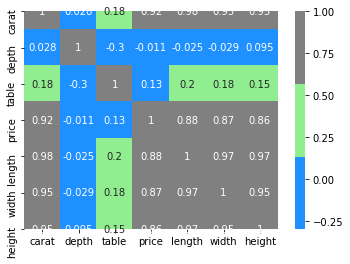

In [40]:
sns.heatmap(data = corrs, square = True, cmap = ["dodgerblue", "lightgreen", "gray"], annot = True)

## Feature Importance and Selection

Having obtained these correlations, we can use them to decide which features are more highly correlated and therefore build our models based on these. We can utilise `sklearn`'s [`feature_selection`](https://scikit-learn.org/stable/modules/feature_selection.html) module to help us better get feature importance. This is "nice" since it will provide us with p values and their respective significance. From the documentation, `f_regression` attempts to:
```
Univariate linear regression tests.

Linear model for testing the individual effect of each of many regressors.
This is a scoring function to be used in a feature selection procedure, not
a free standing feature selection procedure.


1. The correlation between each regressor and the target is computed,
   that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) *
   std(y)).
2. It is converted to an F score then to a p-value.

```


In [45]:
from sklearn.feature_selection import f_regression

In [189]:
f_value, p_value = f_regression(x_train, y_train)
data = pd.DataFrame([f_value, x_train.columns.values, p_value]).T
data.columns = ["f_value", "predictor", "p_value"]
sorted_data = data.sort_values(by = "p_value", ascending = False)
sorted_data

,f_value,predictor,p_value
4,2.57586,depth,0.108513
1,67.325,cut,2.36548e-16
3,212.346,clarity,5.49869e-48
9,212.346,clairty,5.49869e-48
5,707.136,table,1.48645e-154
2,1335.68,color,5.06073e-288
0,242300,carat,0
6,153608,length,0
7,147375,width,0
8,141810,height,0


Having sorted our f_values and p_values, we need to make a choice on what our cut off point is for a statistically significant p_value. Due to convention(Bayesians will likely disagree), I will set the cut off point to 0.05 and choose only those predictors with a p_value less than 0.05 as being statistically significant. We can make this fancy as follows.

In [316]:
sorted_data["signif" ] = np.where(sorted_data["p_value"] > 0.05 , "ns", "sf")
sorted_data[np.where(sorted_data["signif"] == "sf", True, False)].drop(9)



,f_value,predictor,p_value,signif
1,67.325,cut,2.36548e-16,sf
3,212.346,clarity,5.49869e-48,sf
5,707.136,table,1.48645e-154,sf
2,1335.68,color,5.06073e-288,sf
0,242300,carat,0,sf
6,153608,length,0,sf
7,147375,width,0,sf
8,141810,height,0,sf


From the above, it appears that the most likely(highly correlated) variables with price are cut,clarity, table and color. We shall therefore fit a new model with only these predictors and see how well it works, but first how does this result relate to the correlations we obtained above? 

In [315]:
to_index = list(sorted_data["predictor"].values)
# cannot use drop_dupes for some reason
del to_index[2]
# display correlations with price
corrs[[x for x in to_index if x in corrs.columns]].loc["price"]

depth    -0.010647
table     0.127134
carat     0.921591
length    0.884435
width     0.865421
height    0.861249
Name: price, dtype: float64

Looking at the above table, we can  see that carat, length, width and height happen to have a high correlation with  price. Therefore, we can build our models around these features and see how well it performs. Let us visualize these and see. 

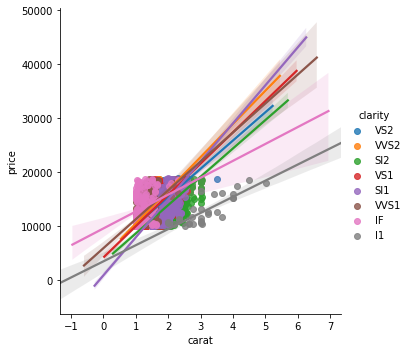

In [317]:
# Points clustered together. Might be best to reduce this clustering
# Decided to filter for only highly priced diamonds
# perhaps add some noise(jitter?)

sns.lmplot(x = "carat", y = "price", data = diamonds.query("price >= 10000"), hue = "clarity")

From the above plot, we see a generally highly linear relationship between price and clarity/carat. It is therefore possible that a model with these two features alone would likely provide strong predictive power for a dimaond's price. 

**It is worth mentioning however that linear regression does not mean a linear relationship between the target and the variables but rather the target and the coefficients of the variables ie in the equation y = mx + c, y is linearly correlated to m and not necessarily x.**


## Future Steps

It would be close to impossible if not impossible to fully analyse and cover all important parts of linear regression. I therefore conclude this kernel(notebook) by thanking you for your time. As a bonus, here are a few interesting future steps that lack of space unfortunately prevents us from exploring.

1. Build Models based on the most highly correlated variables

2. Compare the above models with a model that uses all variables in the dataset.

3. Use a Bayesian approach to statistical modeling to see how well this would compare to what we have.

4. Improve the visualizations.

5. Experiment with more "advanced models"(knns, svms, random forests, xgboost, adaboost, etc)

6. Deploy  a real world model and see how this works on an actual real world problem.


**Thank you for reading and do provide feeback on what works and what doesn't.** You can contact me via my Github [repo](https://github.com/Nelson-Gon/sweetpy) or by email(via [Kaggle](https://www.kaggle.com/gonnel)'s) contact me .
